# Reducción de dimensionalidad

## PCA

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TP4/data/mnist_train.csv")
# Separar características (X) y etiquetas (y)
X_train = df.drop('label', axis=1)  # Características (todos los píxeles)
y_train = df['label']  # Etiquetas (números del 0 al 9)

# Verificar las dimensiones de X e y
print("*******************\nTRAIN\n*******************")
print("Dimensiones de X:", X_train.shape)
print("Dimensiones de y:", y_train.shape)

df_test = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TP4/data/mnist_test.csv")
# Separar características (X) y etiquetas (y)
X_test = df_test.drop('label', axis=1)  # Características (todos los píxeles)
y_test = df_test['label']  # Etiquetas (números del 0 al 9)

# Verificar las dimensiones de X e y
print("\n*******************\nTEST\n*******************")
print("Dimensiones de X:", X_test.shape)
print("Dimensiones de y:", y_test.shape)

*******************
TRAIN
*******************
Dimensiones de X: (60000, 784)
Dimensiones de y: (60000,)

*******************
TEST
*******************
Dimensiones de X: (10000, 784)
Dimensiones de y: (10000,)


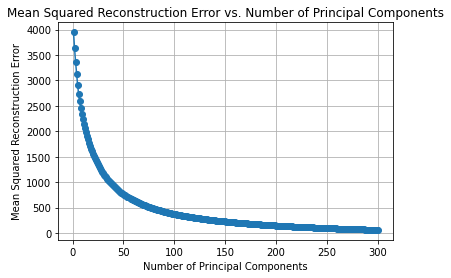

In [12]:
from PCA import PCA

train_errors = []
explained_variances = []
num_components_range = range(1, 301)  # Testing different numbers of principal components

for n_components in num_components_range:
    # Step 3: Instantiating the PCA class
    pca = PCA(n_components=n_components)
    
    # Step 4: Fitting the PCA model to the training data
    pca.fit(X_train)

    # Compute the explained variance ratio
    explained_variance = np.sum(pca.eigenvalues[:n_components]) / np.sum(pca.eigenvalues)
    
    # Append the explained variance ratio to the list
    explained_variances.append(explained_variance)
    
    # Step 5: Transforming the training data into the new feature space
    X_train_transformed = pca.transform(X_train)
    
    # Step 6: Reconstructing the original data from the reduced feature space
    X_train_reconstructed = pca.reconstruct(X_train_transformed)
    
    # Step 7: Computing the mean squared reconstruction error
    reconstruction_error = np.mean((X_train.values - X_train_reconstructed) ** 2)
    train_errors.append(reconstruction_error)

# Step 8: Plotting the mean squared reconstruction error
plt.plot(num_components_range, train_errors, marker='o')
plt.title('Mean Squared Reconstruction Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.grid(True)
plt.show()

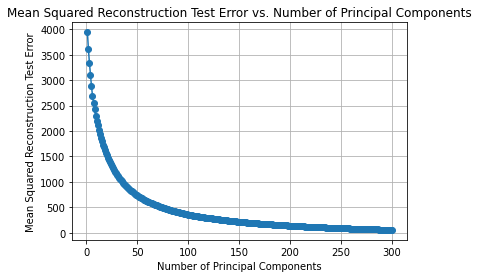

In [17]:
test_errors = []
explained_variances = []
num_components_range = range(1, 301)  # Testing different numbers of principal components

for n_components in num_components_range:
    # Step 3: Instantiating the PCA class
    pca = PCA(n_components=n_components)
    
    # Step 4: Fitting the PCA model to the training data
    pca.fit(X_test)

    # Compute the explained variance ratio
    explained_variance = np.sum(pca.eigenvalues[:n_components]) / np.sum(pca.eigenvalues)
    
    # Append the explained variance ratio to the list
    explained_variances.append(explained_variance)
    
    # Step 5: Transforming the training data into the new feature space
    X_test_transformed = pca.transform(X_test)
    
    # Step 6: Reconstructing the original data from the reduced feature space
    X_test_reconstructed = pca.reconstruct(X_test_transformed)
    
    # Step 7: Computing the mean squared reconstruction error
    reconstruction_error = np.mean((X_test.values - X_test_reconstructed) ** 2)
    test_errors.append(reconstruction_error)

# Step 8: Plotting the mean squared reconstruction error
plt.plot(num_components_range, test_errors, marker='o')
plt.title('Mean Squared Reconstruction Test Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Test Error')
plt.grid(True)
plt.show()

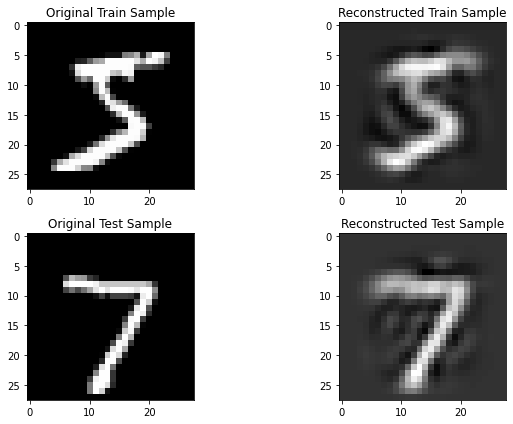

In [16]:
# Assuming you have chosen an appropriate number of principal components
chosen_components = 50  # Example: You can replace this with your chosen number

# Fit PCA with the chosen number of components
pca = PCA(n_components=chosen_components)
pca.fit(X_train)

# Transform the first sample from the training and test sets
X_train_sample_transformed = pca.transform(X_train.iloc[[0]])
X_test_sample_transformed = pca.transform(X_test.iloc[[0]])

# Reconstruct the original digits from the reduced feature space
X_train_sample_reconstructed = pca.inverse_transform(X_train_sample_transformed)
X_test_sample_reconstructed = pca.inverse_transform(X_test_sample_transformed)

# Reshape the reconstructed digits to their original shape (28x28)
X_train_sample_reconstructed = X_train_sample_reconstructed.reshape(28, 28)
X_test_sample_reconstructed = X_test_sample_reconstructed.reshape(28, 28)

# Plot the original and reconstructed digits for the first sample in both sets
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(X_train.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title('Original Train Sample')

plt.subplot(2, 2, 2)
plt.imshow(X_train_sample_reconstructed, cmap='gray')
plt.title('Reconstructed Train Sample')

plt.subplot(2, 2, 3)
plt.imshow(X_test.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title('Original Test Sample')

plt.subplot(2, 2, 4)
plt.imshow(X_test_sample_reconstructed, cmap='gray')
plt.title('Reconstructed Test Sample')

plt.tight_layout()
plt.show()
